<a href="https://colab.research.google.com/github/wellingtonngallo/tcc-regressao/blob/master/steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
#bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn import metrics

#machine learning
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

In [170]:
df = pd.read_excel('/content/aluguel_imoveis.xlsx')

In [171]:
def scatter_plot_with_correlation_line(x, y,title,xlabel,ylabel, graph_filepath):
    '''
    http://stackoverflow.com/a/34571821/395857
    x does not have to be ordered.
    '''
    # Scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '-', color='red')
    plt.xlabel(xlabel, labelpad=13)
    plt.ylabel(ylabel, labelpad=13)
    plt.title(title, y=1.015);

In [172]:
y = df['valor_total']
feature_columns = ['area', 'area', 'qtd_quartos',	'qtd_banheiro', 'qtd_vaga_garagem']
X = df[feature_columns]

In [173]:
x_train, x_teste, y_train, y_teste = train_test_split(X,y, test_size = 0.3)

# Linear Regression

In [174]:
linear_model = linear_model.LinearRegression()
modelRegression = linear_model.fit(x_train, y_train)

regression_train_prediction = modelRegression.predict(x_train)
print("Train MAE: ",mean_absolute_error(y_train, regression_train_prediction))

regression_test_predictions = modelRegression.predict(x_teste)
print("Test MAE: ",mean_absolute_error(y_teste, regression_test_predictions))

print('R2 = %s' % metrics.r2_score(y_teste, regression_test_predictions).round(2))

Train MAE:  1397.904301561984
Test MAE:  1378.724121659486
R2 = 0.53


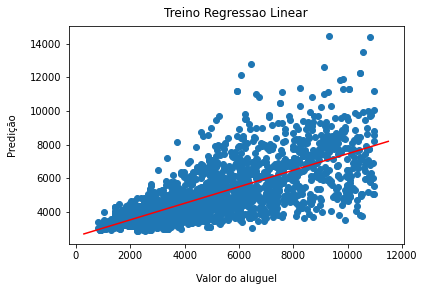

In [175]:
correlation, p_value = stats.pearsonr(y_train, regression_train_prediction)
scatter_plot_with_correlation_line(y_train, regression_train_prediction,'Treino Regressao Linear'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

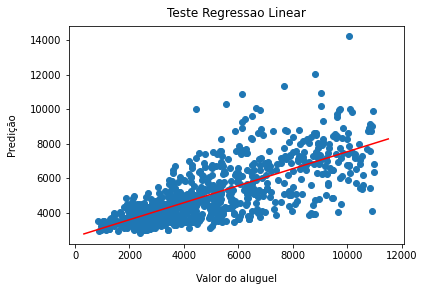

In [176]:
correlation, p_value = stats.pearsonr(y_teste, regression_test_predictions)
scatter_plot_with_correlation_line(y_teste, regression_test_predictions,'Teste Regressao Linear'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

# Decision Tree Regression

In [177]:
decisionTree = DecisionTreeRegressor(random_state=1)
modelDecisionTree = decisionTree.fit(x_train, y_train)

decision_tree_train_prediction = modelDecisionTree.predict(x_train)
print("Train MAE: ",mean_absolute_error(y_train, decision_tree_train_prediction))

decision_tree_test_prediction = modelDecisionTree.predict(x_teste)
print("Test MAE: ",mean_absolute_error(y_teste, decision_tree_test_prediction))
print('R2 = %s' % metrics.r2_score(y_teste, decision_tree_test_prediction).round(2))


Train MAE:  559.0130086582595
Test MAE:  1507.3268216378458
R2 = 0.33


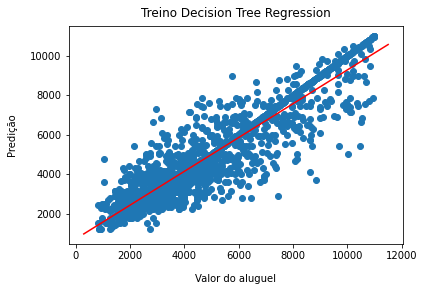

In [178]:
correlation, p_value = stats.pearsonr(y_train, decision_tree_train_prediction)
scatter_plot_with_correlation_line(y_train, decision_tree_train_prediction,'Treino Decision Tree Regression'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')

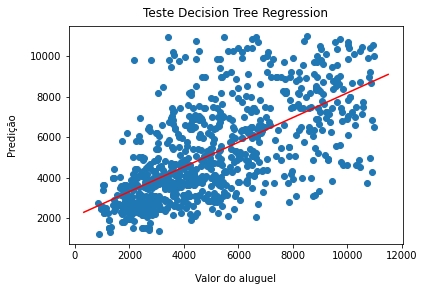

In [179]:
correlation, p_value = stats.pearsonr(y_teste, decision_tree_test_prediction)
scatter_plot_with_correlation_line(y_teste, decision_tree_test_prediction,'Teste Decision Tree Regression'.format(correlation),'Valor do aluguel','Predição', 'correlation_mlr.png')